# Visual Question Answering with ViLT

**ViLT = Vision-and-Language Pre-training**

The ViLT model was proposed in ViLT: Vision-and-Language Transformer Without Convolution or Region Supervision by Wonjae Kim, Bokyung Son, Ildoo Kim.<br>
ViLT incorporates text embeddings into a Vision Transformer (ViT), allowing it to have a minimal design for Vision-and-Language Pre-training (VLP).

<img src="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/vilt_architecture.jpg" width=860>

> https://huggingface.co/docs/transformers/model_doc/vilt


### You can use the raw model for visual question answering

In [2]:
import datetime
import requests
import sys

from PIL import Image
from transformers import ViltProcessor, ViltForQuestionAnswering,\
ViltForImageAndTextRetrieval, pipeline

In [3]:
sys.version

'3.8.5 (default, Sep  4 2020, 07:30:14) \n[GCC 7.3.0]'

In [4]:
print("Today:", datetime.datetime.today())

Today: 2023-01-20 11:28:07.946611


## Loading ViLT model
> https://github.com/dandelin/ViLT

In [5]:
modelref = "dandelin/vilt-b32-finetuned-vqa"

print("Using ViLT model:", modelref)
processor = ViltProcessor.from_pretrained(modelref)
model = ViltForQuestionAnswering.from_pretrained(modelref)

print("Done")

Using ViLT model: dandelin/vilt-b32-finetuned-vqa
Done


In [6]:
model

ViltForQuestionAnswering(
  (vilt): ViltModel(
    (embeddings): ViltEmbeddings(
      (text_embeddings): TextEmbeddings(
        (word_embeddings): Embedding(30522, 768)
        (position_embeddings): Embedding(40, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (patch_embeddings): ViltPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32))
      )
      (token_type_embeddings): Embedding(2, 768)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViltEncoder(
      (layer): ModuleList(
        (0): ViltLayer(
          (attention): ViltAttention(
            (attention): ViltSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_f

In [7]:
def calling_vilt_model(image, question):
    """
    Calling the ViLT model
    """
    encoding = processor(image, question, return_tensors="pt")
    logits = model(**encoding).logits
    answer = model.config.id2label[logits.argmax(-1).item()]

    print("\n\033[1;31;34m>> Predicted answer =", answer)

    return answer

## Testing the visual question answering model

In [8]:
url1 = "https://github.com/retkowsky/ViLT/raw/main/Gump.jpg"

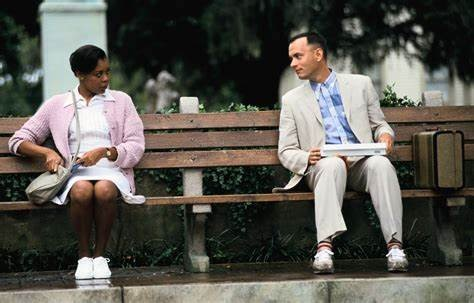

In [9]:
image1 = Image.open(requests.get(url1, stream=True).raw)
image1

In [10]:
question = "Do we have people in this image?"

print(question)
calling_vilt_model(image1, question=question)

Do we have people in this image?

>> Predicted answer = yes


'yes'

In [11]:
question = "How many people are in this image?"

print(question)
calling_vilt_model(image1, question=question)

How many people are in this image?

>> Predicted answer = 2


'2'

In [12]:
question = "What are doing these two people?"

print(question)
calling_vilt_model(image1, question=question)

What are doing these two people?

>> Predicted answer = sitting


'sitting'

In [13]:
question = "Where are sitting these two persons?"

print(question)
calling_vilt_model(image1, question=question)

Where are sitting these two persons?

>> Predicted answer = bench


'bench'

In [14]:
question = "What is the color of the bench?"

print(question)
calling_vilt_model(image1, question=question)

What is the color of the bench?

>> Predicted answer = brown


'brown'

In [15]:
question = "What is behind the bench?"

print(question)
calling_vilt_model(image1, question=question)

What is behind the bench?

>> Predicted answer = bushes


'bushes'

In [16]:
question = "What is the color of the lady's jacket?"

print(question)
calling_vilt_model(image1, question=question)

What is the color of the lady's jacket?

>> Predicted answer = pink


'pink'

In [17]:
question = "What is the color of the lady's shoes?"

print(question)
calling_vilt_model(image1, question=question)

What is the color of the lady's shoes?

>> Predicted answer = white


'white'

## Testing using a pipeline

In [18]:
modelref = "dandelin/vilt-b32-finetuned-vqa"

In [19]:
vqa_pipeline = pipeline("visual-question-answering",
                        model=modelref)

In [20]:
vqa_pipeline

In [21]:
def calling_vilt_pipeline(image, question):
    """
    Calling the ViLT pipeline
    """
    predictions = vqa_pipeline(image, question, top_k=1)
    answer = predictions[0]["answer"]
    score = predictions[0]["score"]

    print("\n\033[1;31;34m>> The answer is:", answer,
          "with score =", score)

    return answer, score

> https://github.com/dandelin/ViLT#download-pretrained-weights

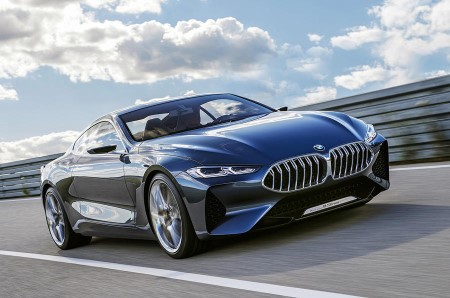

In [22]:
url2 = "https://github.com/retkowsky/ViLT/raw/main/car.jpg"

image2 = Image.open(requests.get(url2, stream=True).raw)
image2

In [23]:
question = "What is in this image?"
print(question)

calling_vilt_pipeline(image2, question=question)

What is in this image?

>> The answer is: car with score = 0.9379242658615112


('car', 0.9379242658615112)

In [24]:
question = "How many cars in this image?"
print(question)

calling_vilt_pipeline(image2, question=question)

How many cars in this image?

>> The answer is: 1 with score = 0.986260712146759


('1', 0.986260712146759)

In [25]:
question = "What is in the background?"
print(question)

calling_vilt_pipeline(image2, question=question)

What is in the background?

>> The answer is: clouds with score = 0.41736510396003723


('clouds', 0.41736510396003723)

In [26]:
question = "Is it taken during the night?"
print(question)

calling_vilt_pipeline(image2, question=question)

Is it taken during the night?

>> The answer is: no with score = 0.9993396401405334


('no', 0.9993396401405334)

In [27]:
question = "What is the color of the car?"
print(question)

calling_vilt_pipeline(image2, question=question)

What is the color of the car?

>> The answer is: blue with score = 0.7584277391433716


('blue', 0.7584277391433716)

In [28]:
question = "What is the brand of the car?"
print(question)

calling_vilt_pipeline(image2, question=question)

What is the brand of the car?

>> The answer is: bmw with score = 0.2908729016780853


('bmw', 0.2908729016780853)

In [29]:
question = "What is the brand of the car?"

print(question)
vqa_pipeline(image2, question, top_k=10)

What is the brand of the car?


[{'score': 0.2908729910850525, 'answer': 'bmw'},
 {'score': 0.18300174176692963, 'answer': 'toyota'},
 {'score': 0.1254531592130661, 'answer': 'ford'},
 {'score': 0.0731884092092514, 'answer': 'cadillac'},
 {'score': 0.05618343874812126, 'answer': 'mercedes'},
 {'score': 0.051463671028614044, 'answer': 'nissan'},
 {'score': 0.04814866930246353, 'answer': 'chevy'},
 {'score': 0.04171412065625191, 'answer': 'chevrolet'},
 {'score': 0.04108158126473427, 'answer': 'honda'},
 {'score': 0.03910074383020401, 'answer': 'unknown'}]

## Another test

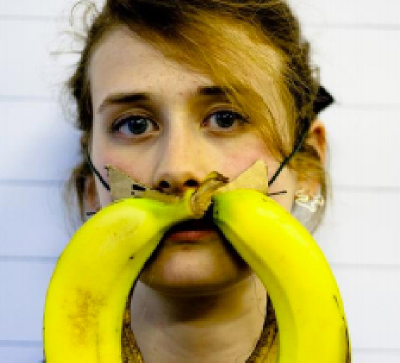

In [30]:
url3 = "https://github.com/retkowsky/ViLT/raw/main/face.jpg"

image3 = Image.open(requests.get(url3, stream=True).raw)
image3.reduce(2)

In [31]:
question = "Is it a person?"
print(question)

calling_vilt_pipeline(image3, question=question)

Is it a person?

>> The answer is: yes with score = 0.9993281364440918


('yes', 0.9993281364440918)

In [32]:
question = "What is the mustache made of?"
print(question)

calling_vilt_pipeline(image3, question=question)

What is the mustache made of?

>> The answer is: banana with score = 0.8494362235069275


('banana', 0.8494362235069275)

In [33]:
question = "How many bananas?"
print(question)

calling_vilt_pipeline(image3, question=question)

How many bananas?

>> The answer is: 2 with score = 0.44099023938179016


('2', 0.44099023938179016)